In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
train = pd.read_csv('/content/gdrive/My Drive/kaggle/rossmann-store-sales/train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [ ]:
train.shape

(1017209, 9)

In [ ]:
train['Date'].min(), train['Date'].max()

('2013-01-01', '2015-07-31')

In [ ]:
train['Date'] =pd.to_datetime(train['Date'])
train = train.set_index('Date')

In [ ]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [ ]:
sales_trend = train.groupby('Date')['Sales'].sum()

In [ ]:
y = sales_trend.resample('M').mean()

In [ ]:
y['2014']

Date
2014-01-31    6.056542e+06
2014-02-28    6.390167e+06
2014-03-31    6.226447e+06
2014-04-30    6.484833e+06
2014-05-31    6.280428e+06
2014-06-30    6.334902e+06
2014-07-31    5.609442e+06
2014-08-31    5.282209e+06
2014-09-30    5.483872e+06
2014-10-31    5.297303e+06
2014-11-30    5.777598e+06
2014-12-31    6.520019e+06
Freq: M, Name: Sales, dtype: float64

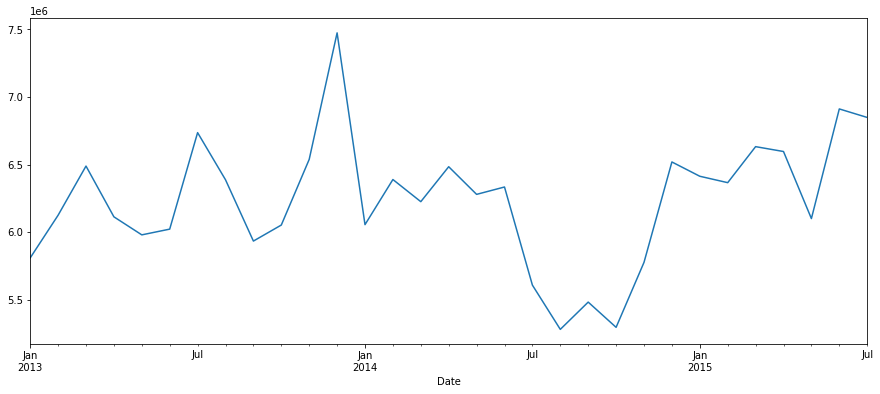

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

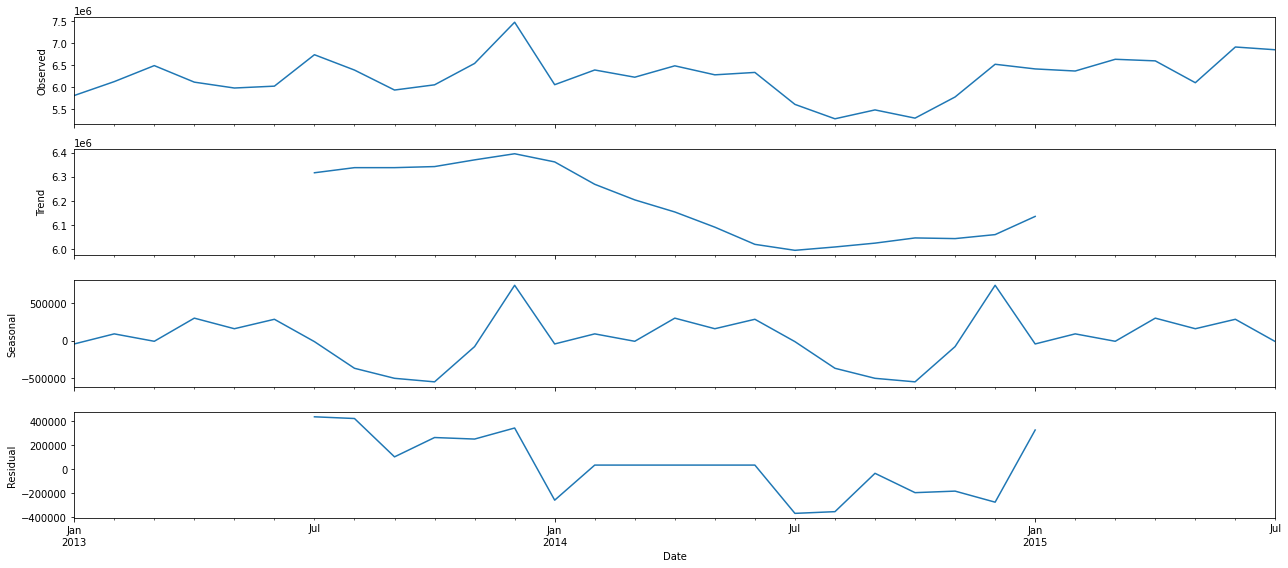

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1026.1839187227292
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:537.6311431942024
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:564.7378953144996
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:205.66176874189148
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:973.9435615960398
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:504.81437732568236
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:635.8496914397834
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:207.81398309662578
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:844.4067393903355
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:507.54262619357974
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:517.941714648448
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:175.13896520556818
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:813.9559681158959
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:475.08473054401867
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:520.9429722472497
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:179.38656935121128
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:874.7865957519924
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:530.9991404017878
ARI

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.903816682122
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:180.36832402148355
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:844.6049515106383
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:505.02528153982274
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:492.91145274033266
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:149.4642417256119
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:815.5712813690291
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:476.8788032384839
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:494.44149192834453
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:150.7050880229289


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8850      1.806     -0.490      0.624      -4.424       2.654
ar.S.L12      -0.8675      1.683     -0.515      0.606      -4.166       2.431
sigma2      3.691e+11   2.09e-12   1.77e+23      0.000    3.69e+11    3.69e+11


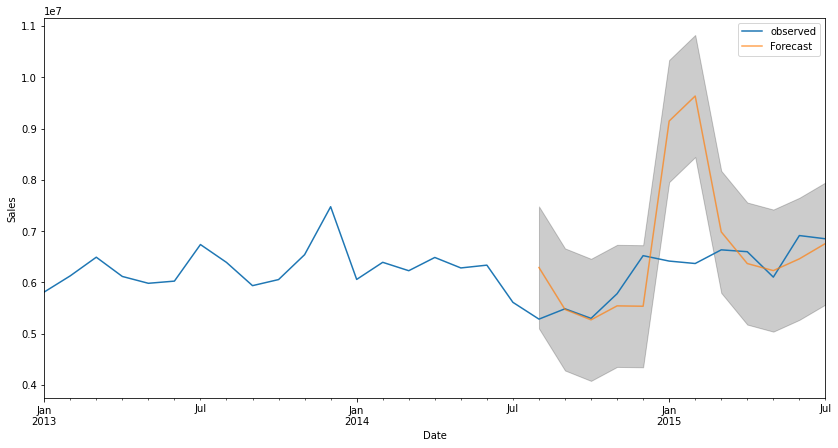

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2014-08-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-08-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1714930300635.1


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1309553.47


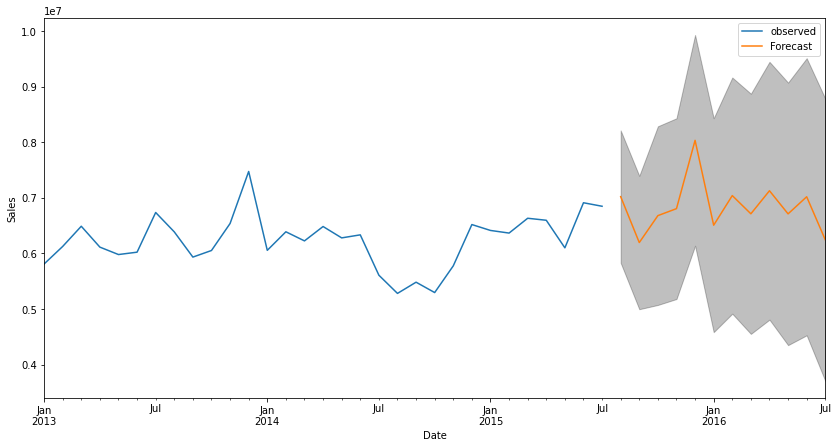

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()